## PRIYA DARSHINI S

## CODE CLAUSE PROJECT 1


## FAKE NEWS PREDICTION


## Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import itertools

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import re
import string

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier





## importing the dataset

In [ ]:
#Read the data
df=pd.read_csv('/content/news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
#Get shape 
df.shape

(6335, 4)

In [ ]:
# Check how the Lables are Distributed

df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:

df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
#dropping null values
df.dropna(inplace=True)

## importing string for the function

In [ ]:
import string as st    

###Remove all punctuations

In [ ]:


def remove_punctuation(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [ ]:
df['New_text']=df['text'].apply(lambda x: remove_punctuation(x))     
df.head()

,Unnamed: 0,title,text,label,New_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...


##Dropping the feature which we don't need

In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)    
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...


## Convert text in lower case, Split() applied for white space

In [ ]:
#Convert text in lower case, Split() applied for white space
import re
def tokenize(text):
    text = re.split('\s+', text)
    return [x.lower() for x in text]

In [ ]:
df['New_text'] = df['New_text'].apply(lambda msg:tokenize(msg))
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, a, shillman, journalism, ..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[us, secretary, of, state, john, f, kerry, sai..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[—, kaydee, king, kaydeeking, november, 9, 201..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[its, primary, day, in, new, york, and, frontr..."


In [ ]:
#Removal of tokens less than length 2

def rem_small_words(text):
    return [x for x in text if len(x)>2]

In [ ]:
df['New_text'] = df['New_text'].apply(lambda x: rem_small_words(x))
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[kaydee, king, kaydeeking, november, 2016, the..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[its, primary, day, new, york, and, frontrunne..."


In [ ]:
# Create sentences to get clean text as input for vectors
def return_setances(tokens):
    return " ".join([word for word in tokens])

In [ ]:
df['New_text'] = df['New_text'].apply(lambda x: return_setances(x))
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield shillman journalism fellow t...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,secretary state john kerry said monday that wi...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king kaydeeking november 2016 the lesso...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,its primary day new york and frontrunners hill...


In [ ]:
df.sample(10)


,title,text,label,New_text
4035,'There's No Case Here.' Clinton Defiant amid E...,The race for the White House has become even m...,REAL,the race for the white house has become even m...
1959,Comment on 7 Effective Ways To Balance Hormone...,Poor gut health and food allergies: More resea...,FAKE,poor gut health and food allergies more resear...
5252,What Is Operation Bluebeam? Will It Derail the...,\n \n\nMore rumors are surfacing on Operation ...,FAKE,more rumors are surfacing operation bluebeam a...
1376,Cahill vs. Kalma Debut Album Out Now!,We Are Change \n\nThe debut album by Cahill vs...,FAKE,are change the debut album cahill kalma extrem...
2421,Your election night survival guide: what to ex...,To become the 45th president of the United Sta...,REAL,become the 45th president the united states hi...
4431,Miss Russia | Russia & India Report,Miss Russia AFP/East News \nMiss Russia Alisa ...,FAKE,miss russia afpeast news miss russia alisa man...
592,"‘A noun, a verb and Donald Trump’: Rubio seeks...",Print \nAs Marco Rubio and Patrick Murphy squa...,FAKE,print marco rubio and patrick murphy squared o...
4410,"Cheney Hates Trump, Endorses Him Anyway",NOT ON THE SHORT LIST\n\nFormer Vice President...,REAL,not the short list former vice president dick ...
182,Iran carries out new ballistic missile test,Iran successfully test-fired a medium-range ba...,REAL,iran successfully testfired mediumrange ballis...
2943,JUST IN: FBI Reopens Hillary Clinton Email Probe,JUST IN: FBI Reopens Hillary Clinton Email Pro...,FAKE,just fbi reopens hillary clinton email probe p...


##Exploratory data analysis

Let's visualize the proportion of real and fake news!

In [ ]:
#real vs fake
import plotly.express as px
fig = px.pie(df,names='label',title='Proportion of Real vs. Fake News')
fig.show()

##Generate Basic WordCloud

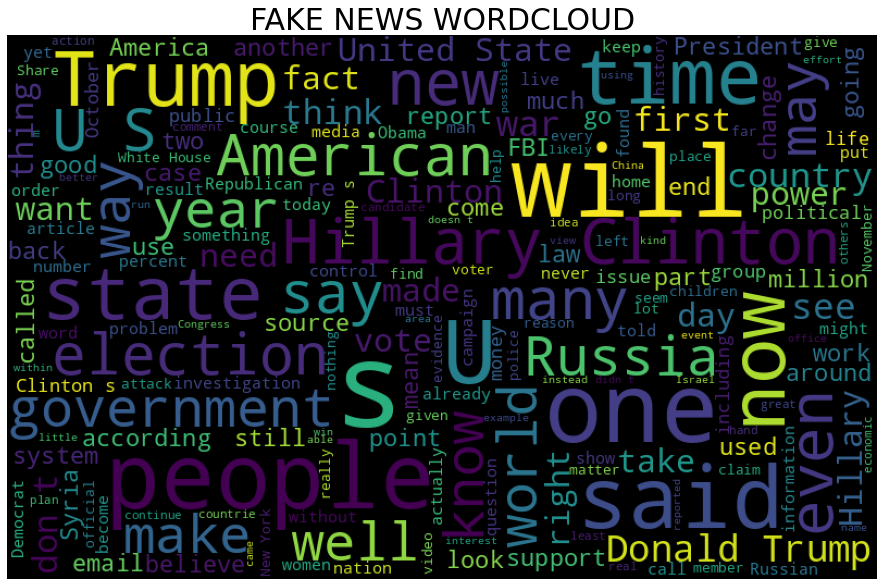

In [ ]:
from wordcloud import WordCloud

# Create and generate a word cloud image FAKE_NEWS
fake_data = df[df["label"] == "FAKE"]
fake_text = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fake_text)
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.title('FAKE NEWS WORDCLOUD',fontsize= 30)
plt.show()


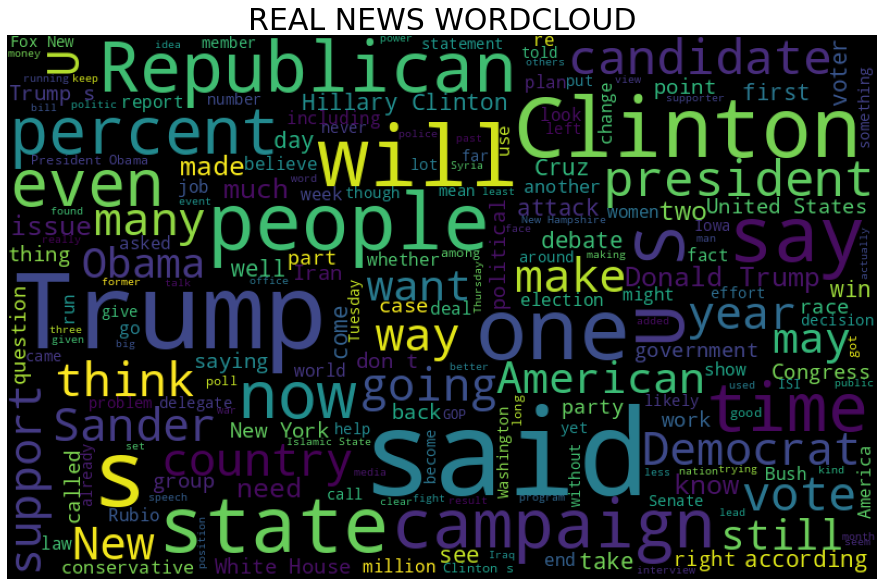

In [ ]:
# Create and generate a word cloud image REAL_NEWS
real_data = df[df["label"] == "REAL"]
real_text = ' '.join([text for text in real_data.text])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_text)
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.title('REAL NEWS WORDCLOUD',fontsize= 30)
plt.show()

## comparing Real and Fake

Text(0.5, 1.0, 'Fake news')

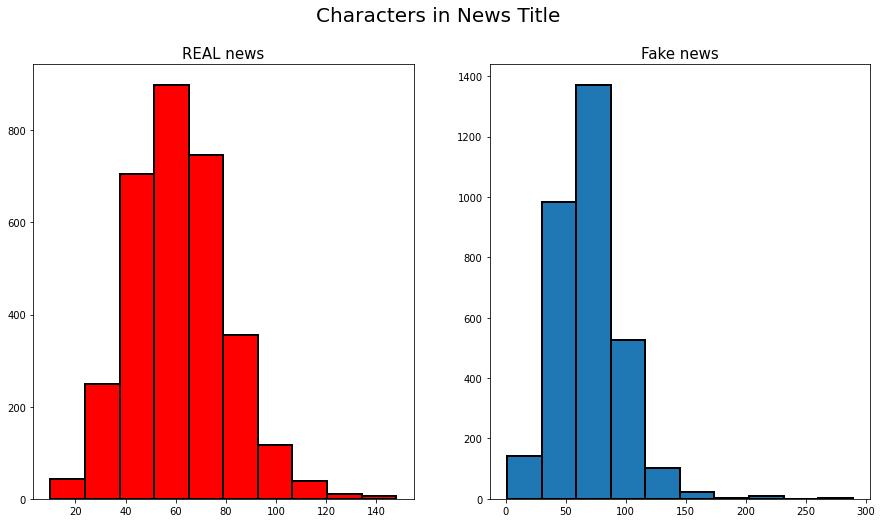

In [ ]:
#Comparing the Total numbers of Characters in the Feature Title

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=df[df['label']=='REAL']['title'].str.len()
ax1.hist(news_len,color='red',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=df[df['label']=='FAKE']['title'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

In [ ]:
#creating a bag of words with the consecutive frequency for fake text

import nltk
import seaborn as sns
fake_text_vis =' '.join([str(x) for x in df[df['label']=='FAKE']['New_text']])
a = nltk.FreqDist(fake_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

,Word,Count
40778,24hour,5
74208,damaging”,1
24790,dams,8
61688,amazon’s,1
19732,shark,8
28559,dsosniknbacom,1
37898,buzzwords,4
24319,wildlife…,1
13877,girls’,3
75624,kura,4


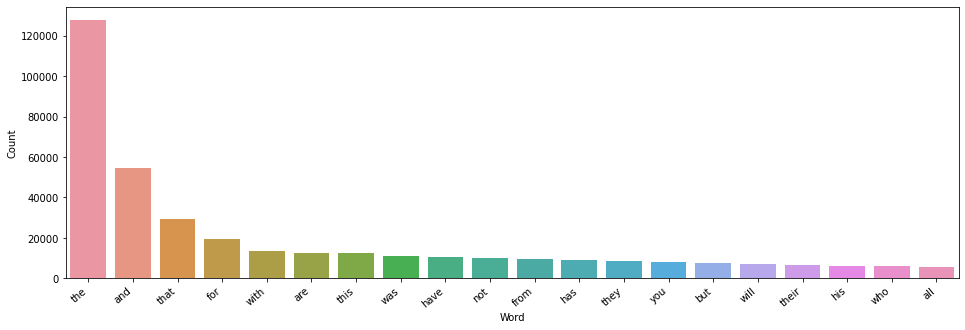

In [ ]:
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
#creating a bag of words with the consecutive frequency for Real text
import nltk
import seaborn as sns
real_text_vis =' '.join([str(x) for x in df[df['label']=='REAL']['New_text']])
a = nltk.FreqDist(real_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

,Word,Count
56379,dacalike,1
35971,penalty”,4
51782,colombia’s,1
16334,thune,9
7275,expanding,77
16356,grapple,12
51028,michtom,2
40009,verifiable,5
1179,honoring,17
64232,jowei,1


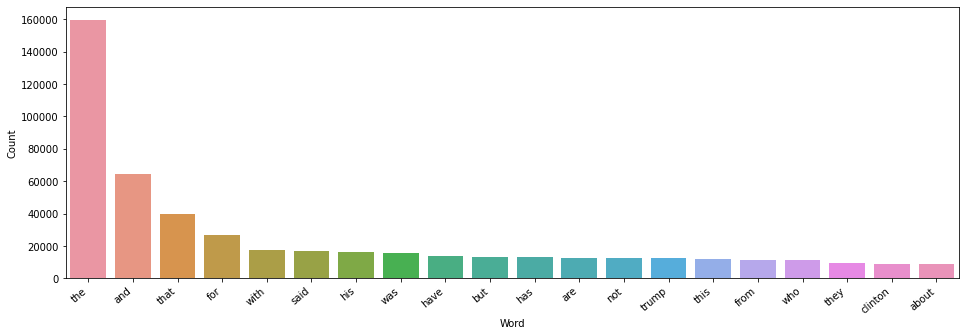

In [ ]:
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

## label encoding 

In [ ]:
df["label"]=df["label"].replace(["FAKE","REAL"],value=[1,0]) #Label Encoding

In [ ]:
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,daniel greenfield shillman journalism fellow t...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,secretary state john kerry said monday that wi...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,kaydee king kaydeeking november 2016 the lesso...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,its primary day new york and frontrunners hill...


## Splitting the dataset to training & test data


In [ ]:

X_train,X_test,y_train,y_test = train_test_split(df['New_text'],df['label'],test_size=0.2, random_state = 10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(5068, 75924)
(1267, 75924)


In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(max_iter = 500)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test,pred2)
cm2 = confusion_matrix(y_test,pred2)
print("Accuracy score : {}".format(accuracy2))
print("Confusion matrix : \n {}".format(cm2))

Accuracy score : 0.9250197316495659
Confusion matrix : 
 [[605  59]
 [ 36 567]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model1= RandomForestClassifier()
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test,pred1)
cm1 = confusion_matrix(y_test,pred1)
print("Accuracy score : {}".format(accuracy1))
print("Confusion matrix : \n {}".format(cm1))

Accuracy score : 0.9052880820836622
Confusion matrix : 
 [[604  60]
 [ 60 543]]


In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier()
model5.fit(X_train,y_train)

pred5 = model5.predict(X_test)

accuracy5 = accuracy_score(y_test,pred5)
cm5 = confusion_matrix(y_test,pred5)
print("Accuracy score : {}".format(accuracy5))
print("Confusion matrix : \n {}".format(cm5))






Accuracy score : 0.8074191002367798
Confusion matrix : 
 [[552 112]
 [132 471]]


In [ ]:
#Support Vector Classification.
from sklearn.svm import SVC
model4=SVC()
model4.fit(X_train,y_train)

pred4 = model4.predict(X_test)

accuracy4 = accuracy_score(y_test,pred4)
cm4 = confusion_matrix(y_test,pred4)
print("Accuracy score : {}".format(accuracy4))
print("Confusion matrix : \n {}".format(cm4))

Accuracy score : 0.9479084451460142
Confusion matrix : 
 [[618  46]
 [ 20 583]]


In [ ]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels={'RandomForestClassifier':accuracy1,'LogisticRegression':accuracy2,
        'SVC':accuracy4,'DecisionTreeClassifier':accuracy5}

<BarContainer object of 4 artists>

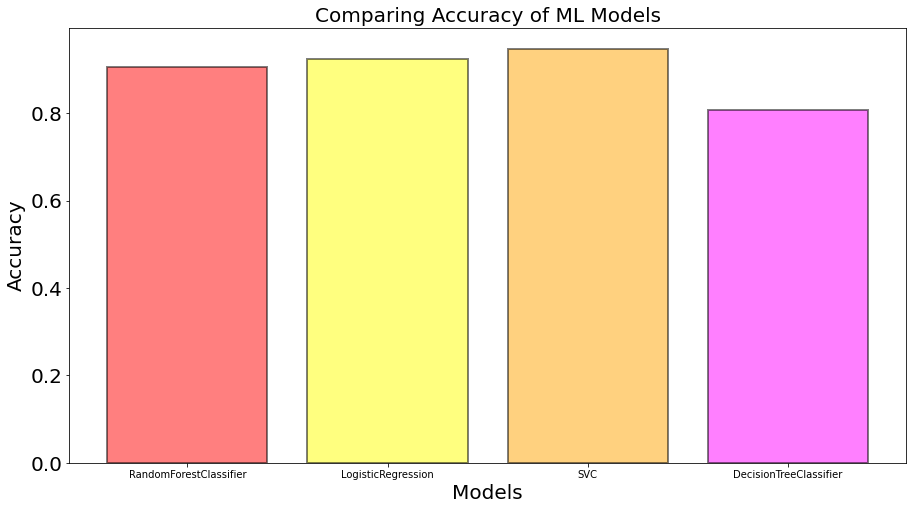

In [ ]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange','magenta','cyan']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)

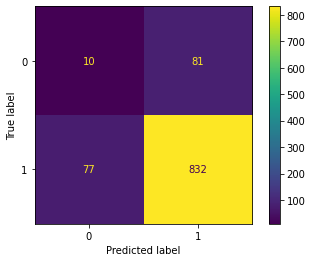

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])

cm_display.plot()
plt.show()

# Comparing Machine Learning models are SVM,logistic regression,Random forest, decision tree.

# The best accuracy is svc(support vector classifier)
# Accuracy:0.9463299131807419